# Plotting with `Series`

At this point we are quite proficient with handling Pandas `Series` objects. We know how to access and modify values by calling suitable methods on a `Series` object. Indeed, the common Pandas workflow --- be it with `Series` or `DataFrame`s --- is to "massage" the data with some method calls to bring it into the desired form. This can be selecting a subset of values, transforming or aggregating values. Once the data has been prepared, the next step often is to visualize it. As discussed in the [introduction](why-bother-with-visualizing-data
) compelling visualizations are key aspect of analyzing and understanding data. In the context of data science and machine learning visualizing data is the corner stone of [*exploratory data analysis*](https://en.wikipedia.org/wiki/Exploratory_data_analysis).

The Pandas library offers a quite convenient interface to the [`Matplotlib`](https://matplotlib.org/) library. While a bit aged, Matplotlib offers many powerful tools to easily generate two-dimensional plots. At the same time we should probably also mention [Seaborn](https://seaborn.pydata.org/) and [Plotly](https://plotly.com/python/). Seaborn is a wrapper around Matplotlib with the goal to make commonly-used plots (e.g., histograms, scatter plots, etc.) easily accessible from a high-level Python API. Plotly also has a focus on interactive plots (zooming into plots, reading values from hovering the mouse over data points shown in the plot) which is not supported by Matplotlib.

:::{note} We will neither deal with Seaborn nor Plotly in this course.
:::

As usual we start with some imports.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.style.use("seaborn-v0_8-colorblind")

f"Pandas version: {pd.__version__ = }, Numpy version: {np.__version__ = }"

"Pandas version: pd.__version__ = '2.2.3', Numpy version: np.__version__ = '2.2.2'"

## `Series` plot interface

 Pandas Series objects have an interface to Matplotlib that can be conventiently used to generate plots of datasets. The advantage of having a dedicated method for visualising (parts of) the data will become even more aparent when we deal with Pandas `DataFrame` objects.

 `Series` have a [`.plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html) method that allows tho choose between different types of plots (default value is `'line'`).

 Possilbe value for `kind`:

* `'line'` : line plot (default)
* `'bar'` / `'barh'`: vertical / horizontal bar plot
* `'hist'` : histogram
* `'box'` : boxplot
* `'kde'` : Kernel Density Estimation plot
* `'density'` : same as ‘kde’
* `'area'` : area plot
* `'pie'` : pie plot
* `'scatter'` : scatter plot
* `'hexbin'` : hexbin plot.

Additionally, it is also possible to call a plot method like so:

```python
>>> s.plot(kind="bar", ...) # using `.plot(kind='bar')
>>> s.plot.bar(...)  # using dedicated method for bar-plot
```

In the following we will discuss some example usage of the `Series` plot interface on some toy data. We will also discuss some good practices for generating plots.

(creating-an-appropriate-plot)=
## Creating an appropriate plot

In our first example we consider a `Series` containing repeated letters, i.e., each letter occurrs at least once in the `Series`. We would like to know the count of each letter and to visualise the result in a suitable manner. To get this information we use the `.value_counts()` method. The of calling this method is a new `Series` with each letter in the index and the count as values.

Consider the following table that contains repeating values (index does not matter in this example).

| index   |   values |
|---:|---------:|
|  0 |        1 |
|  1 |        2 |
|  2 |        1 |
|  3 |        1 |
|  4 |        3 |
|  5 |        4 |
|  6 |        5 |
|  7 |       10 |
|  8 |       10 |

Calling the `.value_counts()` method on this `Series` yields the following:

|  value  |   count |
|---:|---------:|
|  1 |        3 |
| 10 |        2 |
|  2 |        1 |
|  3 |        1 |
|  4 |        1 |
|  5 |        1 |

By default the entries in the resulting `Series` are given in descending order based on their count.

In [2]:
rng = np.random.default_rng(seed=42)

In [3]:
import itertools
import string

s = pd.Series(
    data=itertools.chain.from_iterable(
        [letter] * rng.choice(range(1, 10))
        for idx, letter in enumerate(string.ascii_letters[:10])
    ),
)

This is the output of `.value_counts()`. Additionally, the entries of the new `Series` are sorted by the content of the index.

In [4]:
s.value_counts().sort_index()

a    1
b    7
c    6
d    4
e    4
f    8
g    1
h    7
i    2
j    1
Name: count, dtype: int64

Let's generate our first plot. The first thing that might come to our mind (some of you will object, but bear with us for the moment :-)) is a line plot.

<Axes: >

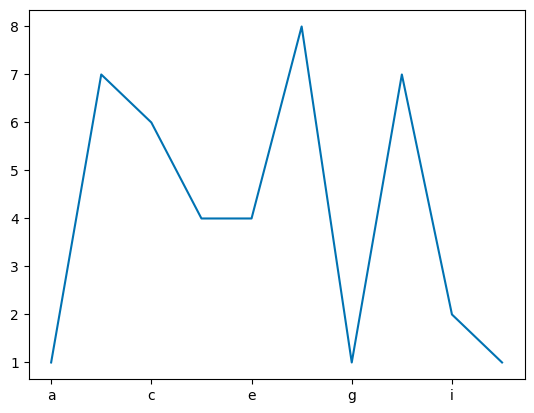

In [5]:
(
    s
    .value_counts()
    .sort_index()
    .plot
    .line()
)

There are quite a few things we do *not* like about this (believe, me I have people seen making such a plot for this kind of data!). For the moment we take note of the following:

* There is no title (maybe optional, if the axes labels are clear about what is actually shown).
* There are no axes labels.

How can we remedy these issues? Well, having a look at the [documentation]((https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html)) of the `.plot()` method (or, likewise the [`.line()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.line.html)) reveals the `title`, `xlabel`, and `ylabel` parameters. Let's use these to add some additional information to our plot.

<Axes: title={'center': 'Count of item'}, xlabel='item name', ylabel='Count'>

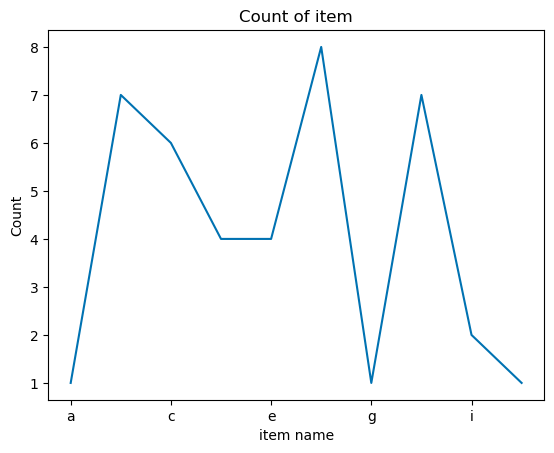

In [6]:
(
    s
    .value_counts()
    .sort_index()
    .plot
    .line(
        title="Count of item",
        xlabel="item name",
        ylabel="Count",
    )
)

Needless to say, there is still room for improvement. We further object that neighboring data points are connected and each data points is not clearly indicated by a dot. Furthermore, not every item name is shown on the x-axis.

The single items contained in the `Series` do not necessarily bear any relation. Hence, connecting them is rather confusing.[^connecting-points-when-they-should-not-be] We rather should indicate each count as a single stand-alone instance in the plot. One way would be to remove the lines alltogether and to add dots (or a similar symbol) instead.

[^connecting-points-when-they-should-not-be]: The single items could represent different categories in your data (see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)). Some notorious nit-pickers might even accuse of having "invented" additional data --- in particular if the actual data points are not clearly indicated by using an appropriate marker.

We use the following additional keywords to achieve this (see [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for a detailed overview of possible options):

* `linestyle`: Set this to an empty string to remove the lines.
* `marker`: Specify the kind of symbol to use to indicate the actual data points.
* `xticks`: Specify the positions at which to draw ticks on the x-axis (`yticks` is also available for the y-axis). In this case we the `.nunique()` method to determine the number of unique elements in the original `Series`. This number is the same as the size of the `Series` resulting from the `.value_counts()` method.
* `grid`: Wether to draw a grid.

<Axes: title={'center': 'Count of item'}, xlabel='item name', ylabel='Count'>

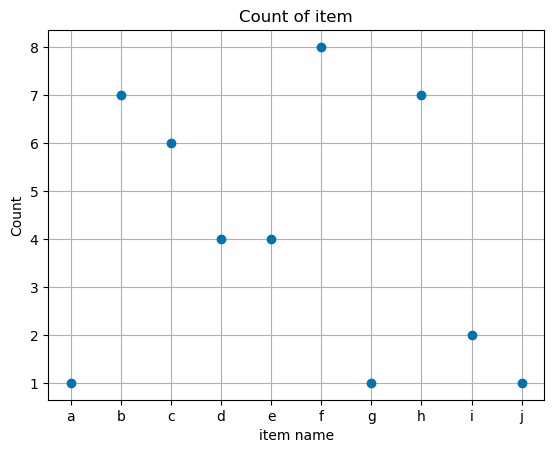

In [7]:
(
    s
    .value_counts()
    .sort_index()
    .plot
    .line(
        title="Count of item",
        xlabel="item name",
        ylabel="Count",
        linestyle="",
        marker="o",
        xticks=range(s.nunique()),
        grid=True,
    )
)

In our final version of the plot we use bar plot. Each count is represented as a (vertical) bar. In this way each instance is represented as a single, self-contained piece of information in the plot. We use the `rot` keyword to specify the rotation angle used for the names of the items.

<Axes: title={'center': 'Count of item'}, xlabel='item name', ylabel='Count'>

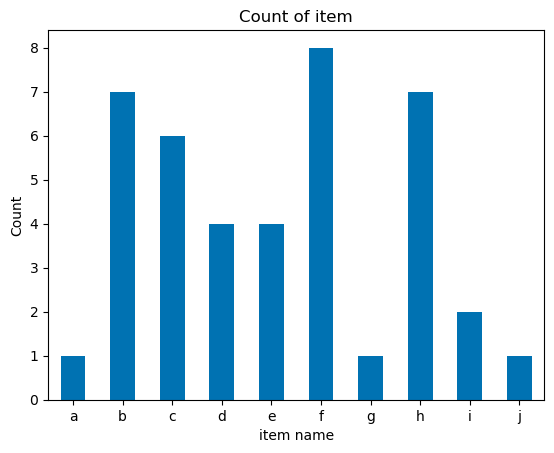

In [8]:
(
    s
    .value_counts()
    .sort_index()
    .plot
    .bar(
        title="Count of item",
        xlabel="item name",
        ylabel="Count",
        rot=0,
    )
)

(exercise-plotting-normalised-item-counts)=
### Exercise

Come up with *two* different types of plot that show the *relative proportions* in % of the single items in the above `Series`.

**Hint**: It is sufficient if the relative proportions can be estimated *visually*. We do not need the exact values here.

<Axes: title={'center': 'Count of item'}, xlabel='item name', ylabel='proportion  [%]'>

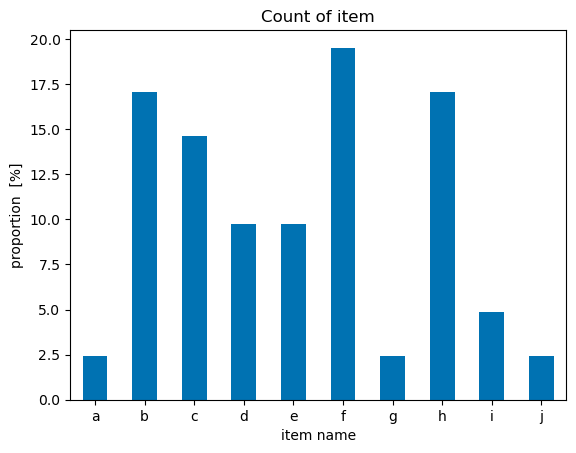

In [9]:
(
    s
    .value_counts(normalize=True)
    .mul(100)
    .sort_index()
    .plot
    .bar(
        title="Count of item",
        xlabel="item name",
        ylabel="proportion  [%]",
        rot=0,
    )
)

<Axes: title={'center': 'Pie chart of normalized item counts'}, ylabel='count'>

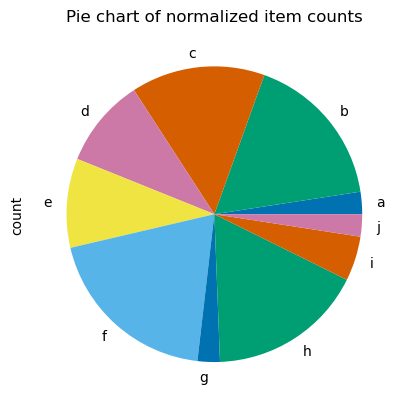

In [10]:
(
    s
    .value_counts()
    .sort_index()
    .plot
    .pie(
        title="Pie chart of normalized item counts",
    )
)

(series-plotting-different-orders-of-magnitude)=
## Dealing with different orders of magnitude

We will stay with the example of counting items; but this time we will make the occurrences highly imbalanced. Indeed, when dealing with categorical data we sometimes find that in a particular feature some categories are highly under-represented while others dominate. It may also happen that the same observation is made for the target variable in a classification task. Early spotting these imbalances in a dataset greatly helps to set up the machine learning workflow appropriately. Creating expressive visualizations is essential in this context.

In [11]:
s = pd.Series(
    data=itertools.chain.from_iterable(
        [letter] * n_occurrence
        for idx, (letter, n_occurrence) in enumerate(
            zip(
                string.ascii_letters[:6],
                [10, 1, 2_500, 300, 5_000, 10_000],
            )
        )
    )
)

Now let's create a visualization of the counts per item and find out what we can see. Having learned something from the previous discussion we directly opt for the bar plot.

<Axes: title={'center': 'Count of item'}, xlabel='item name', ylabel='Count'>

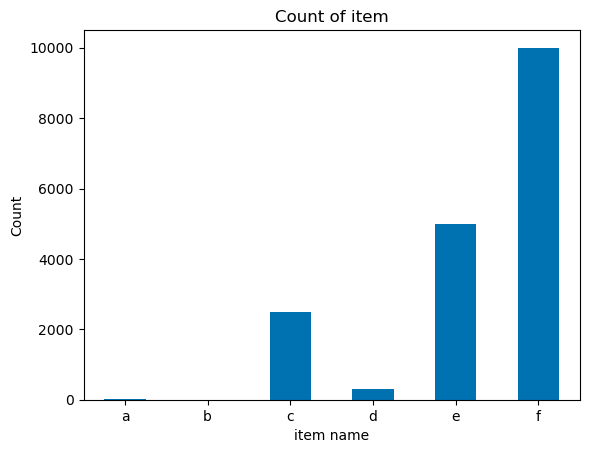

In [12]:
(
    s
    .value_counts()
    .sort_index()
    .plot
    .bar(
        title="Count of item",
        xlabel="item name",
        ylabel="Count",
        rot=0,
    )
)

Well, evidently the item counts differ by several orders of magnitude. But we would like to know what the order of maginitude of each individual count is. This information should indeed be available from the plot. One way to ensure this is to a logarithmic scale on the y-axis (using one on the x-axis obviously does not make any sense!). Pandas plotting methods have the `logy` (and also the `logx`) parameter to accomplish this. 

:::{note} While the *scale* is logarithmic (taking the $\log_{10}$ of values) the labels are still that from the linear scale ($1 = 10^0$, $10 = 10^1$, $100 = 10^2$, $1000 = 10^3$, ...). The plotting library in the background usually automatically chooses the labels to be shown on each axis.
:::

The following figure shows how a linear scale is mapped to a logarithmic scale (logarithm for base 10 in this case).

![](https://upload.wikimedia.org/wikipedia/commons/b/bf/Log-Achse.png)

*Image license information*: <a href="https://commons.wikimedia.org/wiki/File:Log-Achse.png">Saure</a>, CC0, via Wikimedia Commons

<Axes: title={'center': 'Count of item'}, xlabel='item name', ylabel='Count'>

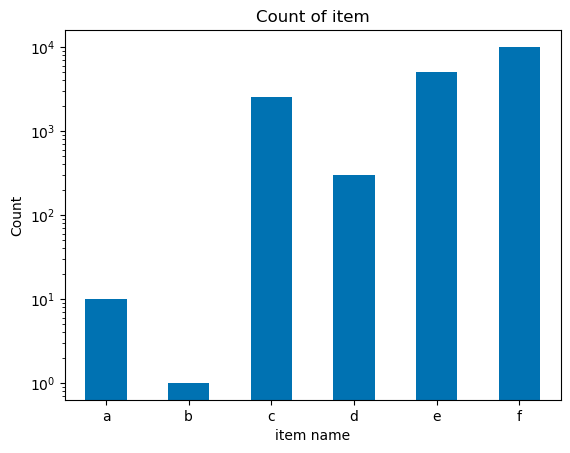

In [13]:
(
    s
    .value_counts()
    .sort_index()
    .plot
    .bar(
        title="Count of item",
        xlabel="item name",
        ylabel="Count",
        rot=0,
        logy=True,
    )
)

As we can see the information about the order of magnitude of each count is now conveniently inferred from the y-axis. Indeed, logarithmic scales are very useful when the values of a certain quantity (e.g. feature in a dataset) are available on different orders of magnitude. 

## Visualizing distributions

The process of gathering data usually means sampling from an underlying distribution. Take for example how net income is distributed amongst citizens of a country. Very roughly speaking, there will be people with low, medium and high net income. However, the number of people with low income will not the same as that of people with medium or high income. The number of people were same for low, medium and high income we would say the data is uniformly distributed. 

The data that we have will usally be continious, i.e. the data does not consist of categories like low, medium or high net income. We are rather given values from a certain range. Then it is quite often informative to visiualize the *empirical distribution* of our given data. 

:::{note} Depending how the data was collected our empirical distribution might not closely resemble that actual distribution of the data. One of the reasons for this is usually only a finite amount of data samples are gathered.
:::

In [14]:
s = pd.Series(rng.normal(loc=5, size=100))

A common way to visualize such data is consider the range spanned by the smallest and largest value (min. and max. value) of the data. This range is subdivided into a given amount of *bins*. Each bin covers a certain portion of the range. Depending on its position in the range each data value will be assigned to a particular bin. Once all data values have been assigned, we *count* all values contained in a bin. The position of each bin is then plotted on the x-axis and the count on the y-axis. Such a plot is called a *histogram*.

More formally: Let $a$, $b$ be the min. and max. value and let $N$ the number of bins. The width of each bin is given by $w = \operatorname{ceiling}\left((b - a) / N\right)$. The location of the $i$-th bin $B_i$ is $l_i = a + i\cdot w$, $i = 0, \dots, N - 1$. Some value $x_j$ ($j = 0, \dots, \vert D \vert - 1$, where $\vert D \vert$ is the number of data instances in some dataset $D$) is contained in the $i$-th bin if[^assignment-to-bin]

$$
x_j \in B_i \Leftrightarrow l_i \leq x_j < l_{i + 1}.
$$

[^assignment-to-bin]: It is also possible to use e.g. the *right* boundary of the bin to test for equality: $x_j \in B_i \Leftrightarrow l_i < x_j {\color{red}{\;\leq\;}} l_{i + 1}$.

We can conveniently use the [`.plot.hist()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.hist.html#pandas.Series.hist) method to generate such a histogram plot. The `bins` parameters can be used to determine the number of bins to used to collect data values.

<Axes: title={'center': 'Empirical distribution of data'}, xlabel='value', ylabel='count'>

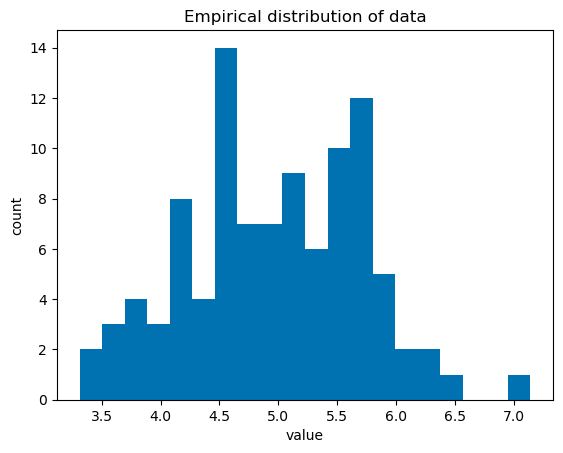

In [15]:
(
    s
    .plot
    .hist(
        bins=20,
        title="Empirical distribution of data",
        xlabel="value",
        ylabel="count",
    )
)

In [16]:
pd.cut(s, bins=20)
# s.min(), s.max()

0     (3.696, 3.887]
1     (5.036, 5.227]
2     (4.653, 4.844]
3     (4.844, 5.036]
4      (4.078, 4.27]
           ...      
95    (4.461, 4.653]
96    (6.184, 6.376]
97    (4.461, 4.653]
98     (5.61, 5.802]
99    (3.887, 4.078]
Length: 100, dtype: category
Categories (20, interval[float64, right]): [(3.309, 3.504] < (3.504, 3.696] < (3.696, 3.887] < (3.887, 4.078] ... (6.376, 6.567] < (6.567, 6.759] < (6.759, 6.95] < (6.95, 7.142]]

Finally, we note that the we can also use a box plot to visualize a distribution. Such a plot deserves some further explanation, however.

### Interquartile range (IQR)

#### What is the IQR?

The IQR is the difference between the 25th (second quartile) and 75th (third quartile) percentile. Let $x$ be some feature; further let $q_{25}$​ and $q_{75}$​ be the 25th and 75th percentile for this feature. The IQR then is

$$
\Delta_\mathrm{IQR} = q_{75} - q_{25}
$$

The IQR can be visualised with the standard format of a boxplot.

* The upper and lower boundary of the box span the IQR which is bounded by the first ($q_{25}$) and the third quartile ($q_{75}$). 
* The *median* (second quartile, or $q_{50}$​) is the vertical bar inside the box. 
* The vertical bars outside of IQR are at the positions $q_{25}​ - \frac{3}{2}​ \Delta_\mathrm{IQR}​$ (lower) and $q_{75} ​+ \frac{3}{2}​\Delta_\mathrm{IQR​}$ (upper).

:::{note} The distance of the vertical bars (also called *whiskers*) from the first and third quartile may be different even though they both should be $\frac{3}{2}​\Delta_\mathrm{IQR​}$​ away from the respective quantile. The reason is that the whisker can be at most $\frac{3}{2}​\Delta_\mathrm{IQR​}$​ away from the first or third quartile. If the smallest / largest value is closer than this distance from the first / third quartile, the the corresponding whisker must mark the position of this value instead. In this case the lower whisker marks the 0th percentile while the upper whisker marks the 100th percentile. It thus may happen that both whiskers have different distances from their quantile.
:::

The following sketch summarises some of the characteristics of a box plot.

![Box plot](../../_build_img/BoxPlot-1.png)

#### What can the IQR be used for?

Based on the IQR and a distance of $\frac{3}{2}\Delta_\mathrm{IQR}$​ from the first and third quartile all points are considered "outliers" that have distances $> \frac{3}{2}\Delta_\mathrm{IQR}$​ from the corresponding quantile. Inside the boxplot the "outliers" are marked by the individual points.

<Axes: title={'center': 'Box plot of empirical data distribution'}, ylabel='value'>

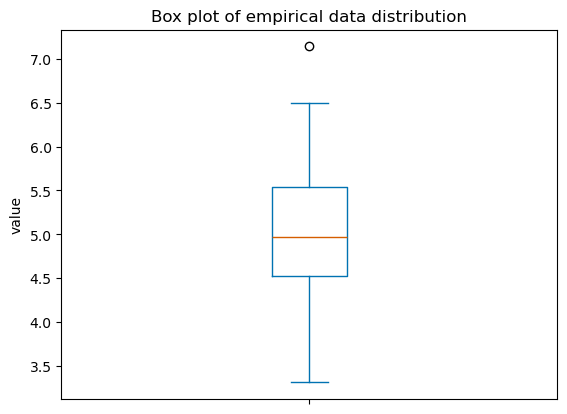

In [17]:
(
    s
    .plot
    .box(
        title="Box plot of empirical data distribution",
        ylabel="value",
    )
)

### Exercises

Below you are given some data sampled from a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution). 

In [18]:
s = pd.Series(rng.poisson(4, 20_000))

#### Generate a histogram of the data

Make sure to add a title, and axis labels.

<Axes: title={'center': 'Empirical distribution of data'}, xlabel='value', ylabel='count'>

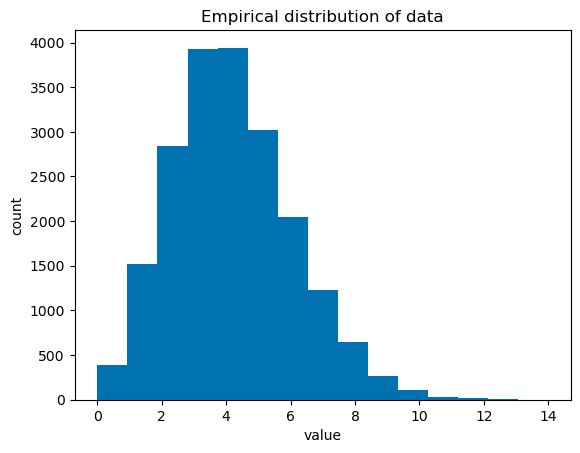

In [26]:
(
    s
    .plot
    .hist(
        bins=15,
        title="Empirical distribution of data",
        xlabel="value",
        ylabel="count",
    )
)

#### Percentiles

Compute the 0th, 25th, 50th (the median), 75th, and 100th percentile of the data by using a suitable Pandas method. Come up with at least two different approaches (methods) to accomplish this.

In [28]:
s.describe().loc[['min', '25%', '50%', '75%', 'max']]

min     0.0
25%     3.0
50%     4.0
75%     5.0
max    14.0
dtype: float64

In [30]:
s.quantile([0, 0.25, 0.5, 0.75, 1])

0.00     0.0
0.25     3.0
0.50     4.0
0.75     5.0
1.00    14.0
dtype: float64

#### Box plot

Generate a box plot of the data. Make sure to add a title and axis labels where appropriate.

<Axes: title={'center': 'Box plot of empirical data distribution'}, ylabel='value'>

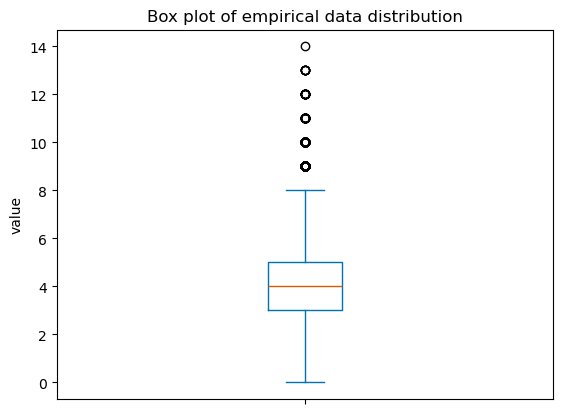

In [31]:
(
    s
    .plot
    .box(
        title="Box plot of empirical data distribution",
        ylabel="value",
    )
)

Remove all "outliers" from the `Series` and return the remaining values as a new `Series`. Visualize the remaining data in a histogram. Make sure to use method chaining, to add a title and axis labels.

In [35]:
threshold = s.quantile(0.75) + 1.5 * (s.quantile(0.75) - s.quantile(0.25))
threshold

np.float64(8.0)

<Axes: title={'center': 'Empirical distribution of data'}, xlabel='value', ylabel='count'>

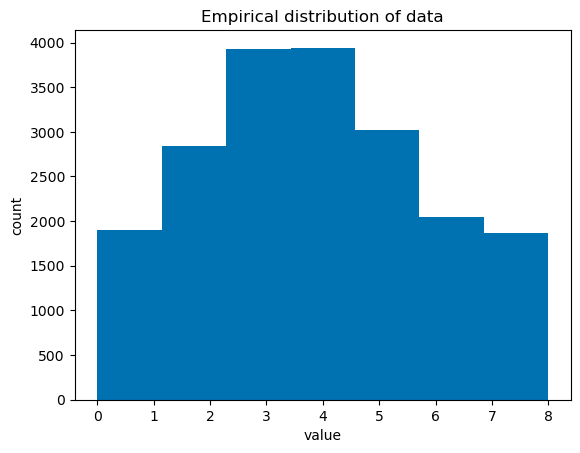

In [38]:
(
    s
    .loc[s <= threshold]
    .plot
    .hist(
        bins=7,
        title="Empirical distribution of data",
        xlabel="value",
        ylabel="count",
    )
)